In [2]:
import cv2
import matplotlib.pyplot as plt

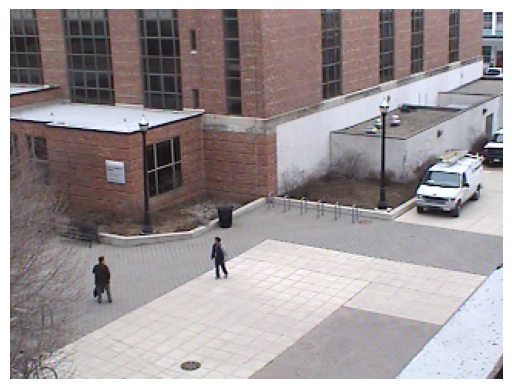

In [4]:
img = cv2.imread("./neural_network/test_rgb/img200.png")
cv2.imshow("img200", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
cv2.waitKey(0)

# closing all open windows
cv2.destroyAllWindows()